In [1]:
__depends__=["../results/ebtel_varying_tau_results.pickle",
             "../results/hydrad_varying_tau_results.pickle"]
__dest__=["../results/f1a.eps","../results/f3a.eps","../results/f5a.eps"]

# Plot Temperature and Density Profiles
Plot EBTEL and HYDRAD temperature and density profiles as a function of time for electron heating, ion heating, and the single-fluid cases for varying pulse duration $\tau$.

In [2]:
import pickle

import numpy as np
from matplotlib import ticker
import matplotlib.pyplot as plt
import seaborn.apionly as sns

%matplotlib inline

In [3]:
plt.rcParams.update({'figure.figsize' : [8,8]})

First, load in the EBTEL and HYDRAD results.

In [4]:
with open(__depends__[0],'rb') as f:
    ebtel_results = pickle.load(f)

In [5]:
with open(__depends__[1],'rb') as f:
    hydrad_results = pickle.load(f)

Define some parameters for labeling.

In [6]:
tau = [20,40,200,500]

## Single-fluid, Figure 1(a)

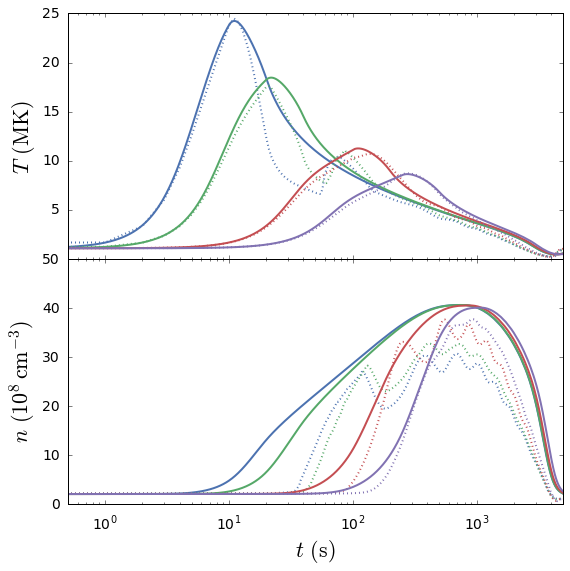

In [7]:
fig,axes = plt.subplots(2,1,sharex=True)
for i in range(len(ebtel_results)):
    axes[0].plot(ebtel_results[i]['t'],ebtel_results[i]['T']/1e+6,color=sns.color_palette('deep')[i],
               linestyle='solid',label=r'$\tau=%d$ $\mathrm{s}$'%tau[i])
    axes[0].plot(hydrad_results['time'],np.array(hydrad_results['single']['tau%ds'%tau[i]]['Te'])/1e+6,
                 color=sns.color_palette('deep')[i],linestyle='dotted')
    axes[1].plot(ebtel_results[i]['t'],ebtel_results[i]['n']/1e+8,color=sns.color_palette('deep')[i],
               linestyle='solid',label=r'$\tau=%d$ $\mathrm{s}$'%tau[i])
    axes[1].plot(hydrad_results['time'],np.array(hydrad_results['single']['tau%ds'%tau[i]]['n'])/1e+8,
                 color=sns.color_palette('deep')[i],linestyle='dotted')
#scale
axes[0].set_xscale('log')
axes[1].set_xscale('log')
#limits
axes[0].set_xlim([0.5,5000])
axes[1].set_xlim([0.5,5000])
axes[0].set_ylim([0,25])
axes[1].set_ylim([0,50])
#tick labels
axes[0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5,prune='lower'))
axes[1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#axes labels
axes[1].set_xlabel(r'$t$ $\mathrm{(s)}$')
axes[0].set_ylabel(r'$T$ $\mathrm{(MK)}$')
axes[1].set_ylabel(r'$n$ $(10^8\,\mathrm{cm}^{-3})$')
#tighten
plt.tight_layout()
plt.subplots_adjust(hspace=0.0)
plt.savefig(__dest__[0],dpi=1000)
plt.show()

## Electron Heating, Figure 3(a)

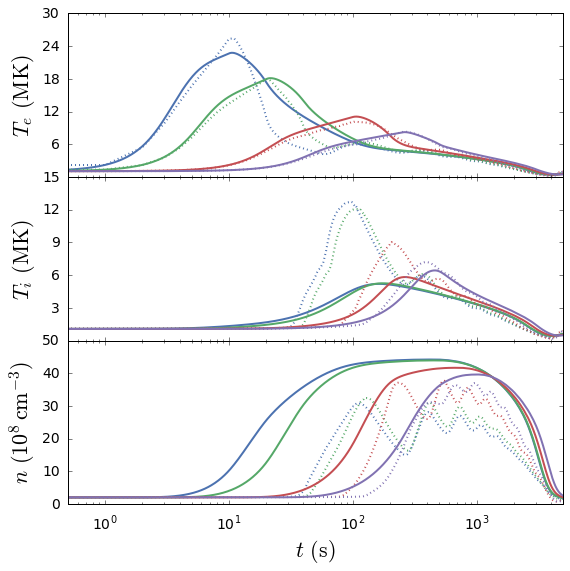

In [8]:
fig,axes = plt.subplots(3,1,sharex=True)
for i in range(len(ebtel_results)):
    #electron temperature
    axes[0].plot(ebtel_results[i]['te'],ebtel_results[i]['Tee']/1e+6,color=sns.color_palette('deep')[i],
               linestyle='solid')
    axes[0].plot(hydrad_results['time'],np.array(hydrad_results['electron']['tau%ds'%tau[i]]['Te'])/1e+6,
                 color=sns.color_palette('deep')[i],linestyle='dotted')
    #ion temperature
    axes[1].plot(ebtel_results[i]['te'],ebtel_results[i]['Tei']/1e+6,color=sns.color_palette('deep')[i],
               linestyle='solid',label=r'$\tau=%d$ $\mathrm{s}$'%tau[i])
    axes[1].plot(hydrad_results['time'],np.array(hydrad_results['electron']['tau%ds'%tau[i]]['Ti'])/1e+6,
                 color=sns.color_palette('deep')[i],linestyle='dotted')
    #density
    axes[2].plot(ebtel_results[i]['te'],ebtel_results[i]['ne']/1e+8,color=sns.color_palette('deep')[i],
               linestyle='solid',label=r'$\tau=%d$ $\mathrm{s}$'%tau[i])
    axes[2].plot(hydrad_results['time'],np.array(hydrad_results['electron']['tau%ds'%tau[i]]['n'])/1e+8,
                 color=sns.color_palette('deep')[i],linestyle='dotted')
#scale
axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
#limits
axes[0].set_xlim([0.5,5000])
axes[0].set_ylim([0,30])
axes[1].set_xlim([0.5,5000])
axes[1].set_ylim([0,15])
axes[2].set_xlim([0.5,5000])
axes[2].set_ylim([0,50])
#tick labels
axes[0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5,prune='lower'))
axes[1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5,prune='lower'))
axes[2].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#axes labels
axes[2].set_xlabel(r'$t$ $\mathrm{(s)}$')
axes[0].set_ylabel(r'$T_e$ $\mathrm{(MK)}$')
axes[1].set_ylabel(r'$T_i$ $\mathrm{(MK)}$')
axes[2].set_ylabel(r'$n$ $(10^8\,\mathrm{cm}^{-3})$')
#tighten
plt.tight_layout()
plt.subplots_adjust(hspace=0.0)
#save
plt.savefig(__dest__[1],dpi=1000)
plt.show()

## Ion Heating, Figure 5(a)

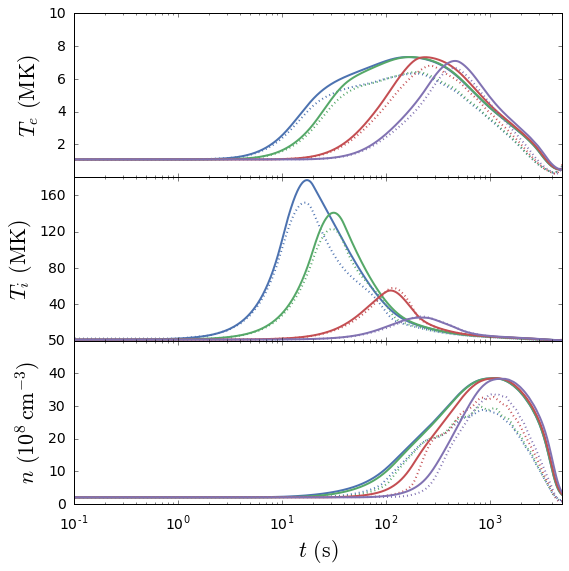

In [9]:
fig,axes = plt.subplots(3,1,sharex=True)
for i in range(len(ebtel_results)):
    #electron temperature
    axes[0].plot(ebtel_results[i]['ti'],ebtel_results[i]['Tie']/1e+6,color=sns.color_palette('deep')[i],
               linestyle='solid',label=r'$\tau=%d$ $\mathrm{s}$'%tau[i])
    axes[0].plot(hydrad_results['time'],np.array(hydrad_results['ion']['tau%ds'%tau[i]]['Te'])/1e+6,
                 color=sns.color_palette('deep')[i],linestyle='dotted')
    #ion temperature
    axes[1].plot(ebtel_results[i]['ti'],ebtel_results[i]['Tii']/1e+6,color=sns.color_palette('deep')[i],
               linestyle='solid')
    axes[1].plot(hydrad_results['time'],np.array(hydrad_results['ion']['tau%ds'%tau[i]]['Ti'])/1e+6,
                 color=sns.color_palette('deep')[i],linestyle='dotted')
    #density
    axes[2].plot(ebtel_results[i]['ti'],ebtel_results[i]['ni']/1e+8,color=sns.color_palette('deep')[i],
               linestyle='solid',label=r'$\tau=%d$ $\mathrm{s}$'%tau[i])
    axes[2].plot(hydrad_results['time'],np.array(hydrad_results['ion']['tau%ds'%tau[i]]['n'])/1e+8,
                 color=sns.color_palette('deep')[i],linestyle='dotted')
    
#scale
axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
#limits
axes[0].set_xlim([0,5000])
axes[0].set_ylim([0,10])
axes[1].set_xlim([0,5000])
axes[1].set_ylim([0,180])
axes[2].set_xlim([0,5000])
axes[2].set_ylim([0,50])
#tick labels
axes[0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5,prune='lower'))
axes[1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5,prune='lower'))
axes[2].yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
#axes labels
axes[2].set_xlabel(r'$t$ $\mathrm{(s)}$')
axes[0].set_ylabel(r'$T_e$ $\mathrm{(MK)}$')
axes[1].set_ylabel(r'$T_i$ $\mathrm{(MK)}$')
axes[2].set_ylabel(r'$n$ $(10^8\,\mathrm{cm}^{-3})$')
#tighten
plt.tight_layout()
plt.subplots_adjust(hspace=0.0)
#save
plt.savefig(__dest__[2],dpi=1000)
plt.show()